In [42]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

from dmba import regressionSummary, exhaustive_search, liftChart, gainsChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [43]:
airfares = pd.read_csv('Airfares.csv')

In [44]:
airfares.sample(10)

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
320,JFK,New York/Newark NY,*,Orlando FL,1.08,3,Yes,No,2386.85,32991.0,22360.0,8621121,1421287,Controlled,Free,947,54990,123.97
546,LGA,New York/Newark NY,*,Syracuse NY,1.00,3,No,No,2806.92,32991.0,22069.0,8621121,743633,Controlled,Free,199,5275,120.84
606,*,New Orleans LA,DCA,Washington DC,1.46,3,No,No,2946.23,22038.0,31981.0,1308499,4549784,Controlled,Free,956,6208,164.30
151,*,Cleveland OH,*,Las Vegas NV,1.36,0,Yes,Yes,4070.45,26046.0,24575.0,2230955,1197234,Free,Free,1831,4543,159.12
211,*,Atlanta GA,*,New Orleans LA,1.02,3,No,No,6269.75,26993.0,22038.0,3532657,1308499,Free,Free,419,7796,120.70
256,*,Fort Meyers FL,JFK,New York/Newark NY,1.22,3,Yes,No,3536.16,24510.0,32991.0,379566,8621121,Controlled,Free,1076,9399,143.20
137,MDW,Chicago IL,*,Kansas City MO,1.04,0,No,Yes,3296.05,29260.0,25450.0,7830332,1694803,Free,Free,407,20529,75.71
140,*,Detroit MI,*,Kansas City MO,1.31,3,No,Yes,5569.75,26506.0,25450.0,4459144,1694803,Free,Constrained,639,4987,123.27
411,*,Las Vegas NV,*,Reno NV,1.00,3,Yes,Yes,5182.37,24575.0,29284.0,1197234,298680,Free,Free,344,13102,54.38
248,*,Denver CO,LGA,New York/Newark NY,1.25,3,No,No,4809.10,29055.0,32991.0,1862106,8621121,Controlled,Free,1624,16240,270.36


In [45]:
airfares.shape

(638, 18)

In [46]:
airfares.dtypes

S_CODE       object
S_CITY       object
E_CODE       object
E_CITY       object
COUPON      float64
NEW           int64
VACATION     object
SW           object
HI          float64
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE      int64
PAX           int64
FARE        float64
dtype: object

In [47]:
predictors = ['COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'FARE']

In [48]:
airfares[predictors].corr()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
COUPON,1.000000,0.020223,-0.347252,-0.088403,0.046889,-0.107763,0.094970,0.746805,-0.336974,0.496537
NEW,0.020223,1.000000,0.054147,0.026597,0.113377,-0.016672,0.058568,0.080965,0.010495,0.091730
HI,-0.347252,0.054147,1.000000,-0.027382,0.082393,-0.172495,-0.062456,-0.312375,-0.168961,0.025195
S_INCOME,-0.088403,0.026597,-0.027382,1.000000,-0.138864,0.517187,-0.272280,0.028153,0.138197,0.209135
E_INCOME,0.046889,0.113377,0.082393,-0.138864,1.000000,-0.144059,0.458418,0.176531,0.259961,0.326092
S_POP,-0.107763,-0.016672,-0.172495,0.517187,-0.144059,1.000000,-0.280143,0.018437,0.284611,0.145097
E_POP,0.094970,0.058568,-0.062456,-0.272280,0.458418,-0.280143,1.000000,0.115640,0.314698,0.285043
DISTANCE,0.746805,0.080965,-0.312375,0.028153,0.176531,0.018437,0.115640,1.000000,-0.102482,0.670016
PAX,-0.336974,0.010495,-0.168961,0.138197,0.259961,0.284611,0.314698,-0.102482,1.000000,-0.090705
FARE,0.496537,0.091730,0.025195,0.209135,0.326092,0.145097,0.285043,0.670016,-0.090705,1.000000


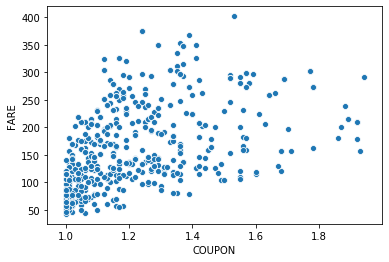

In [49]:
sns.scatterplot(x = 'COUPON', y = 'FARE', data = airfares)

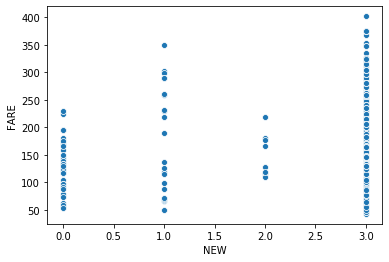

In [50]:
sns.scatterplot(x = 'NEW', y = 'FARE', data = airfares)

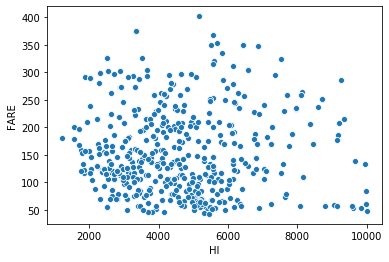

In [51]:
sns.scatterplot(x = 'HI', y = 'FARE', data = airfares)

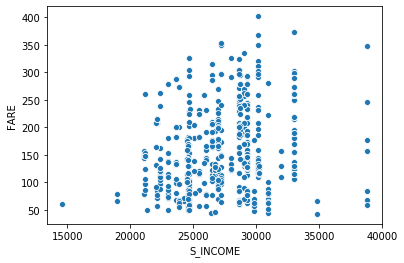

In [52]:
sns.scatterplot(x = 'S_INCOME', y = 'FARE', data = airfares)

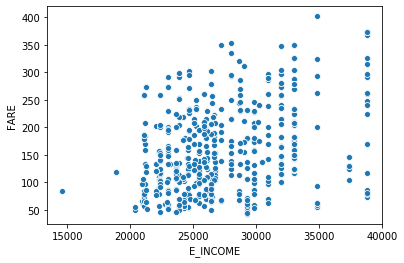

In [53]:
sns.scatterplot(x = 'E_INCOME', y = 'FARE', data = airfares)

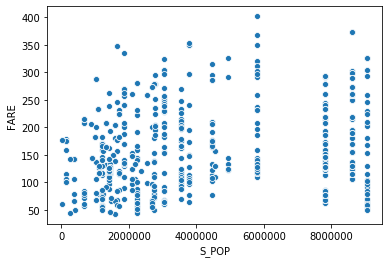

In [54]:
sns.scatterplot(x = 'S_POP', y = 'FARE', data = airfares)

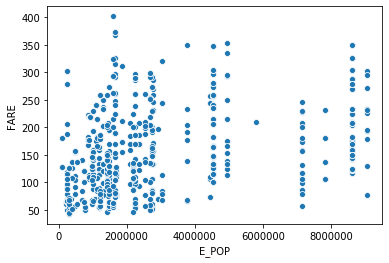

In [55]:
sns.scatterplot(x = 'E_POP', y = 'FARE', data = airfares)

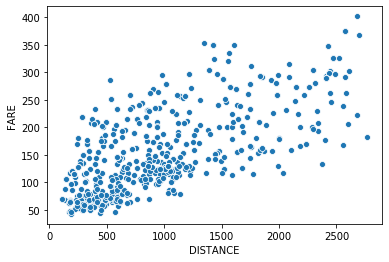

In [56]:
sns.scatterplot(x = 'DISTANCE', y = 'FARE', data = airfares)

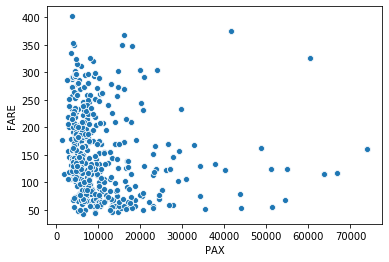

In [57]:
sns.scatterplot(x = 'PAX', y = 'FARE', data = airfares)

From the scatter plots shown above, the best single predictor of FARE is DISTANCE.

In [58]:
len(airfares.loc[airfares['VACATION'] == 'Yes'])/ len(airfares['VACATION'])


0.2664576802507837

The percentage of flights with vacation routes is 26.6% while the percentage of flights with non vacation routes is 73.4%

In [59]:
len(airfares.loc[airfares['SW'] == 'Yes'])/ len(airfares['SW'])


0.30407523510971785

The percentage of routes served by Southwest airlines is 30.4% while the percentage of routes not served by Southwest airlines is 69.6%

In [60]:
len(airfares.loc[airfares['SLOT'] == 'Free'])/ len(airfares['VACATION'])


0.7147335423197492

The percentage of airports congested is 71.5% while the percentage of airports not congested is 28.5%

In [61]:
len(airfares.loc[airfares['GATE'] == 'Free'])/ len(airfares['VACATION'])

0.8056426332288401

The percentage of endpoint airports without gate constraint is 80.6% while the percentage of endpoin airports with gate constraint is 19.4%

In [62]:
airfares.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


In [63]:
pivot_airfares = airfares.copy()

In [64]:
cat_predictors = ['VACATION', 'SW', 'SLOT', 'GATE', 'FARE']
pivot_airfares = pd.get_dummies(pivot_airfares[cat_predictors], drop_first=True)
pd.pivot_table(pivot_airfares, values = ['FARE'], columns = ['VACATION_Yes', 'SW_Yes', 'SLOT_Free', 'GATE_Free'], aggfunc = np.mean)

      VACATION_Yes  SW_Yes  SLOT_Free  GATE_Free
FARE  0             0       0          0            206.797778
                                       1            208.329825
                            1          0            210.581667
                                       1            196.183782
                    1       0          0             74.280000
                                       1            110.170588
                            1          0            139.960000
                                       1             96.951491
      1             0       0          1            139.901786
                            1          0            137.313500
                                       1            143.976716
                    1       0          1            131.605000
                            1          1             89.811176
dtype: float64

Which categorical predictor seems best for predicting FARE?

In [65]:
predictors = ['VACATION', 'SW', 'SLOT', 'GATE', 'COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX']

outcome = 'FARE'

#partition data
X = pd.get_dummies(airfares[predictors], drop_first=True)
y = airfares[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

airfares_lm = LinearRegression()
airfares_lm.fit(train_X, train_y)

#print performance measures
regressionSummary(train_y, airfares_lm.predict(train_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 34.7664
            Mean Absolute Error (MAE) : 27.1065
          Mean Percentage Error (MPE) : -4.5089
Mean Absolute Percentage Error (MAPE) : 20.0849


In [66]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df = 1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)
                     
best_model_ss, best_variables_ss = stepwise_selection(train_X.columns, train_model, score_model, verbose = True)
 
print(best_variables_ss)

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_Yes, SW_Yes, SLOT_Free, GATE_Free
Start: score=4379.42, constant
Step: score=4149.88, add DISTANCE
Step: score=4025.89, add SW_Yes
Step: score=3913.59, add VACATION_Yes
Step: score=3890.27, add HI
Step: score=3873.33, add GATE_Free
Step: score=3852.81, add SLOT_Free
Step: score=3850.30, add PAX
Step: score=3844.58, add E_POP
Step: score=3826.43, add S_POP
Step: score=3821.88, add E_INCOME
Step: score=3821.88, unchanged None
['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'GATE_Free', 'SLOT_Free', 'PAX', 'E_POP', 'S_POP', 'E_INCOME']


Using stepwise selection, the variables selected are Distance, SW_Yes, VACATION_Yes, HI, GATE_Free, SLOT_Free, PAX, E_POP, S_POP, E_INCOME. Distance has the highest score and that means it is the most important predictor.

In [67]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns = ('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')      

     n     r2adj          AIC  COUPON  DISTANCE  E_INCOME  E_POP  GATE_Free     HI    NEW    PAX  \
0    1  0.453107  4149.881509   False      True     False  False      False  False  False  False   
1    2  0.605715  4025.892420   False      True     False  False      False  False  False  False   
2    3  0.706909  3913.585125   False      True     False  False      False  False  False  False   
3    4  0.724977  3890.268211   False      True     False  False      False   True  False  False   
4    5  0.737584  3873.328296   False      True     False  False       True   True  False  False   
5    6  0.751947  3852.808698   False      True     False  False       True   True  False  False   
6    7  0.758747  3843.170960   False      True     False   True      False   True  False   True   
7    8  0.765105  3833.945866   False      True     False   True       True   True  False   True   
8    9  0.770266  3826.433471   False      True     False   True       True   True  False   True   


The best predictors from the exhaustive search are: DISTANCE, SW_Yes, VACATION_Yes,  HI, GATE_Free, E_POP, PAX, S_POP, SLOT_Free and E_INCOME. The worst predictors are: S_INCOME, NEW and COUPON.

In [68]:
#stepwise selection
regressionSummary(valid_y, best_model_ss.predict(valid_X[best_variables_ss]))


Regression statistics

                      Mean Error (ME) : -1.8591
       Root Mean Squared Error (RMSE) : 36.1129
            Mean Absolute Error (MAE) : 28.5252
          Mean Percentage Error (MPE) : -6.7084
Mean Absolute Percentage Error (MAPE) : 21.7198


In [69]:
#exhaustive search
regressionSummary(valid_y, model.predict(valid_X[allVariables]))


Regression statistics

                      Mean Error (ME) : -1.8231
       Root Mean Squared Error (RMSE) : 36.0002
            Mean Absolute Error (MAE) : 28.5002
          Mean Percentage Error (MPE) : -6.6037
Mean Absolute Percentage Error (MAPE) : 21.6048


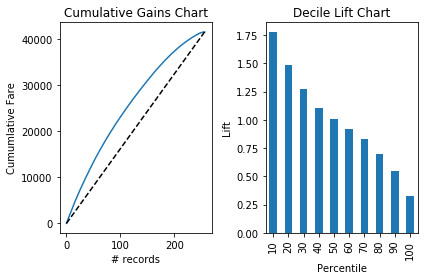

In [70]:
#Cumulative and decile lift chart for stepwise selection
pred_v = pd.Series(best_model_ss.predict(valid_X[best_variables_ss]))
pred_v = pred_v.sort_values(ascending = False)

fig, axes = plt.subplots(nrows=1, ncols = 2)
ax = gainsChart(pred_v, ax = axes[0])
ax.set_ylabel('Cumumlative Fare')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(pred_v, ax = axes[1], labelBars = False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

In [71]:
# group the sorted predictions into 10 roughly equal groups and calculate the mean
groups = [int(10 * i / len(pred_v)) for i in range(len(pred_v))]
meanPercentile = pred_v.groupby(groups).mean()
meanResponse = meanPercentile / pred_v.mean()
meanResponse.index = (meanResponse.index + 1) * 10
print('Lift based on meanResponse', meanResponse[10])

Lift based on meanResponse 1.773850861131499


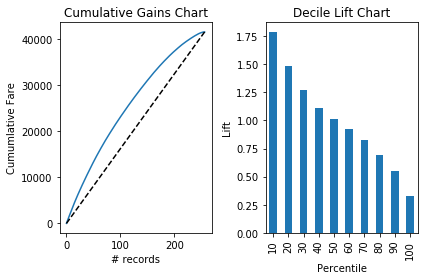

In [72]:
#Cumulative and decile lift chart for exhaustive selection
pred_v_ex = pd.Series(model.predict(valid_X[allVariables]))
pred_v_ex = pred_v_ex.sort_values(ascending = False)

fig, axes = plt.subplots(nrows=1, ncols = 2)
ax = gainsChart(pred_v_ex, ax = axes[0])
ax.set_ylabel('Cumumlative Fare')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(pred_v_ex, ax = axes[1], labelBars = False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

In [73]:
# group the sorted predictions into 10 roughly equal groups and calculate the mean
groups = [int(10 * i / len(pred_v_ex)) for i in range(len(pred_v_ex))]
meanPercentile = pred_v_ex.groupby(groups).mean()
meanResponse = meanPercentile / pred_v_ex.mean()
meanResponse.index = (meanResponse.index + 1) * 10
print('Lift based on meanResponse', meanResponse[10])

Lift based on meanResponse 1.7816299794195178


The stepwise selection model has RMSE of 36.1129 and average error of -1.8591 while the exhaustive search model has RMSE of 36.0002 and average error of  -1.8231. The two models have equal numbers for Lift based on meanResponse. The better model is the exhaustive search model since its RMSE and ME is lesser. 

The best predictors from the exhaustive search are: DISTANCE, SW_Yes, VACATION_Yes, HI, GATE_Free, E_POP, PAX, S_POP, SLOT_Free and E_INCOME. The worst predictors are: S_INCOME, NEW and COUPON.

In [74]:
test = pd.DataFrame({'COUPON': 1.202, 'NEW': 3, 'VACATION_Yes': 0, 'SW_Yes': 0, 'HI': 4442.141, 'S_INCOME': 28760, 'E_INCOME': 27664,
                    'S_POP': 4557004, 'E_POP': 3195503, 'SLOT_Free': 1, 'GATE_Free': 1, 'PAX': 12782, 'DISTANCE': 1976 }, index = [0])

In [75]:
test.head()

,COUPON,NEW,VACATION_Yes,SW_Yes,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT_Free,GATE_Free,PAX,DISTANCE
0,1.202,3,0,0,4442.141,28760,27664,4557004,3195503,1,1,12782,1976


In [76]:
test_pred = model.predict(test)

In [77]:
print(test_pred)

[136822.35707716]


The average fare on a route with the test predictors is $136,822

#prediction when SW_Yes = 1

In [78]:
test2 = pd.DataFrame({'COUPON': 1.202, 'NEW': 3, 'VACATION_Yes': 0, 'SW_Yes': 1, 'HI': 4442.141, 'S_INCOME': 28760, 'E_INCOME': 27664,
                    'S_POP': 4557004, 'E_POP': 3195503, 'SLOT_Free': 1, 'GATE_Free': 1, 'PAX': 12782, 'DISTANCE': 1976 }, index = [0])

In [79]:
test2.head()

,COUPON,NEW,VACATION_Yes,SW_Yes,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT_Free,GATE_Free,PAX,DISTANCE
0,1.202,3,0,1,4442.141,28760,27664,4557004,3195503,1,1,12782,1976


In [80]:
test_pred2 = model.predict(test2)

In [81]:
print(test_pred2)

[136822.35770285]


In [82]:
test_pred2 - test_pred

array([0.00062569])

vii. In reality, which of the factors will not be available for predicting the average fare from a new airport (i.e., before flights start operating on those routes)? Which ones can be estimated? How? 

viii. Select a model that includes only factors that are available before flights begin to operate on the new route. Use an exhaustive search to find such a model. 

ix. Use the model in (viii) to predict the average fare on a route with characteristics COUPON = 1.202, NEW = 3, VACATION = No, SW = No, HI = 4442.141, S_INCOME = $28,760, E_INCOME = $27,664, S_ POP = 4,557,004, E_POP = 3,195,503, SLOT = Free, GATE = Free, PAX = 12,782, DISTANCE = 1976 miles. 

x. Compare the predictive accuracy of this model with model (iii). Is this model good enough, or is it worthwhile reevaluating the model once flights begin on the new route? 